In [76]:
# import all essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [77]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [78]:
data['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [79]:
df = pd.DataFrame(data = california['data'], columns = california['feature_names'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [80]:
df['MedHouseVal'] = california['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [81]:
df.shape

(20640, 9)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [91]:
df['MedHouseVal'] = df['MedHouseVal'].apply(lambda x : x *100000)

In [92]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


In [102]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000


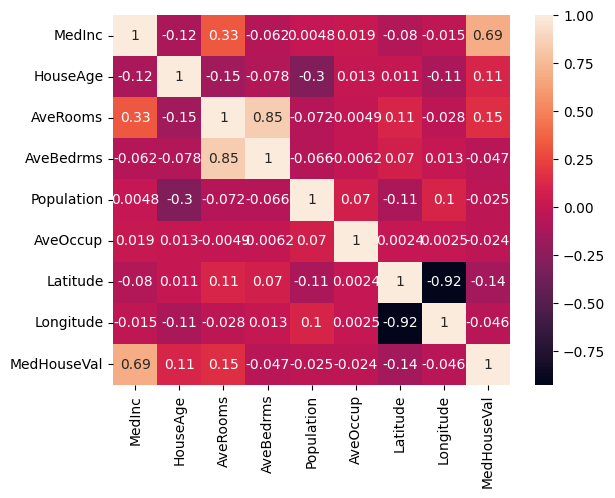

In [93]:
sns.heatmap(df.corr(), annot = True);

/Users/basharkhaddage/Desktop/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


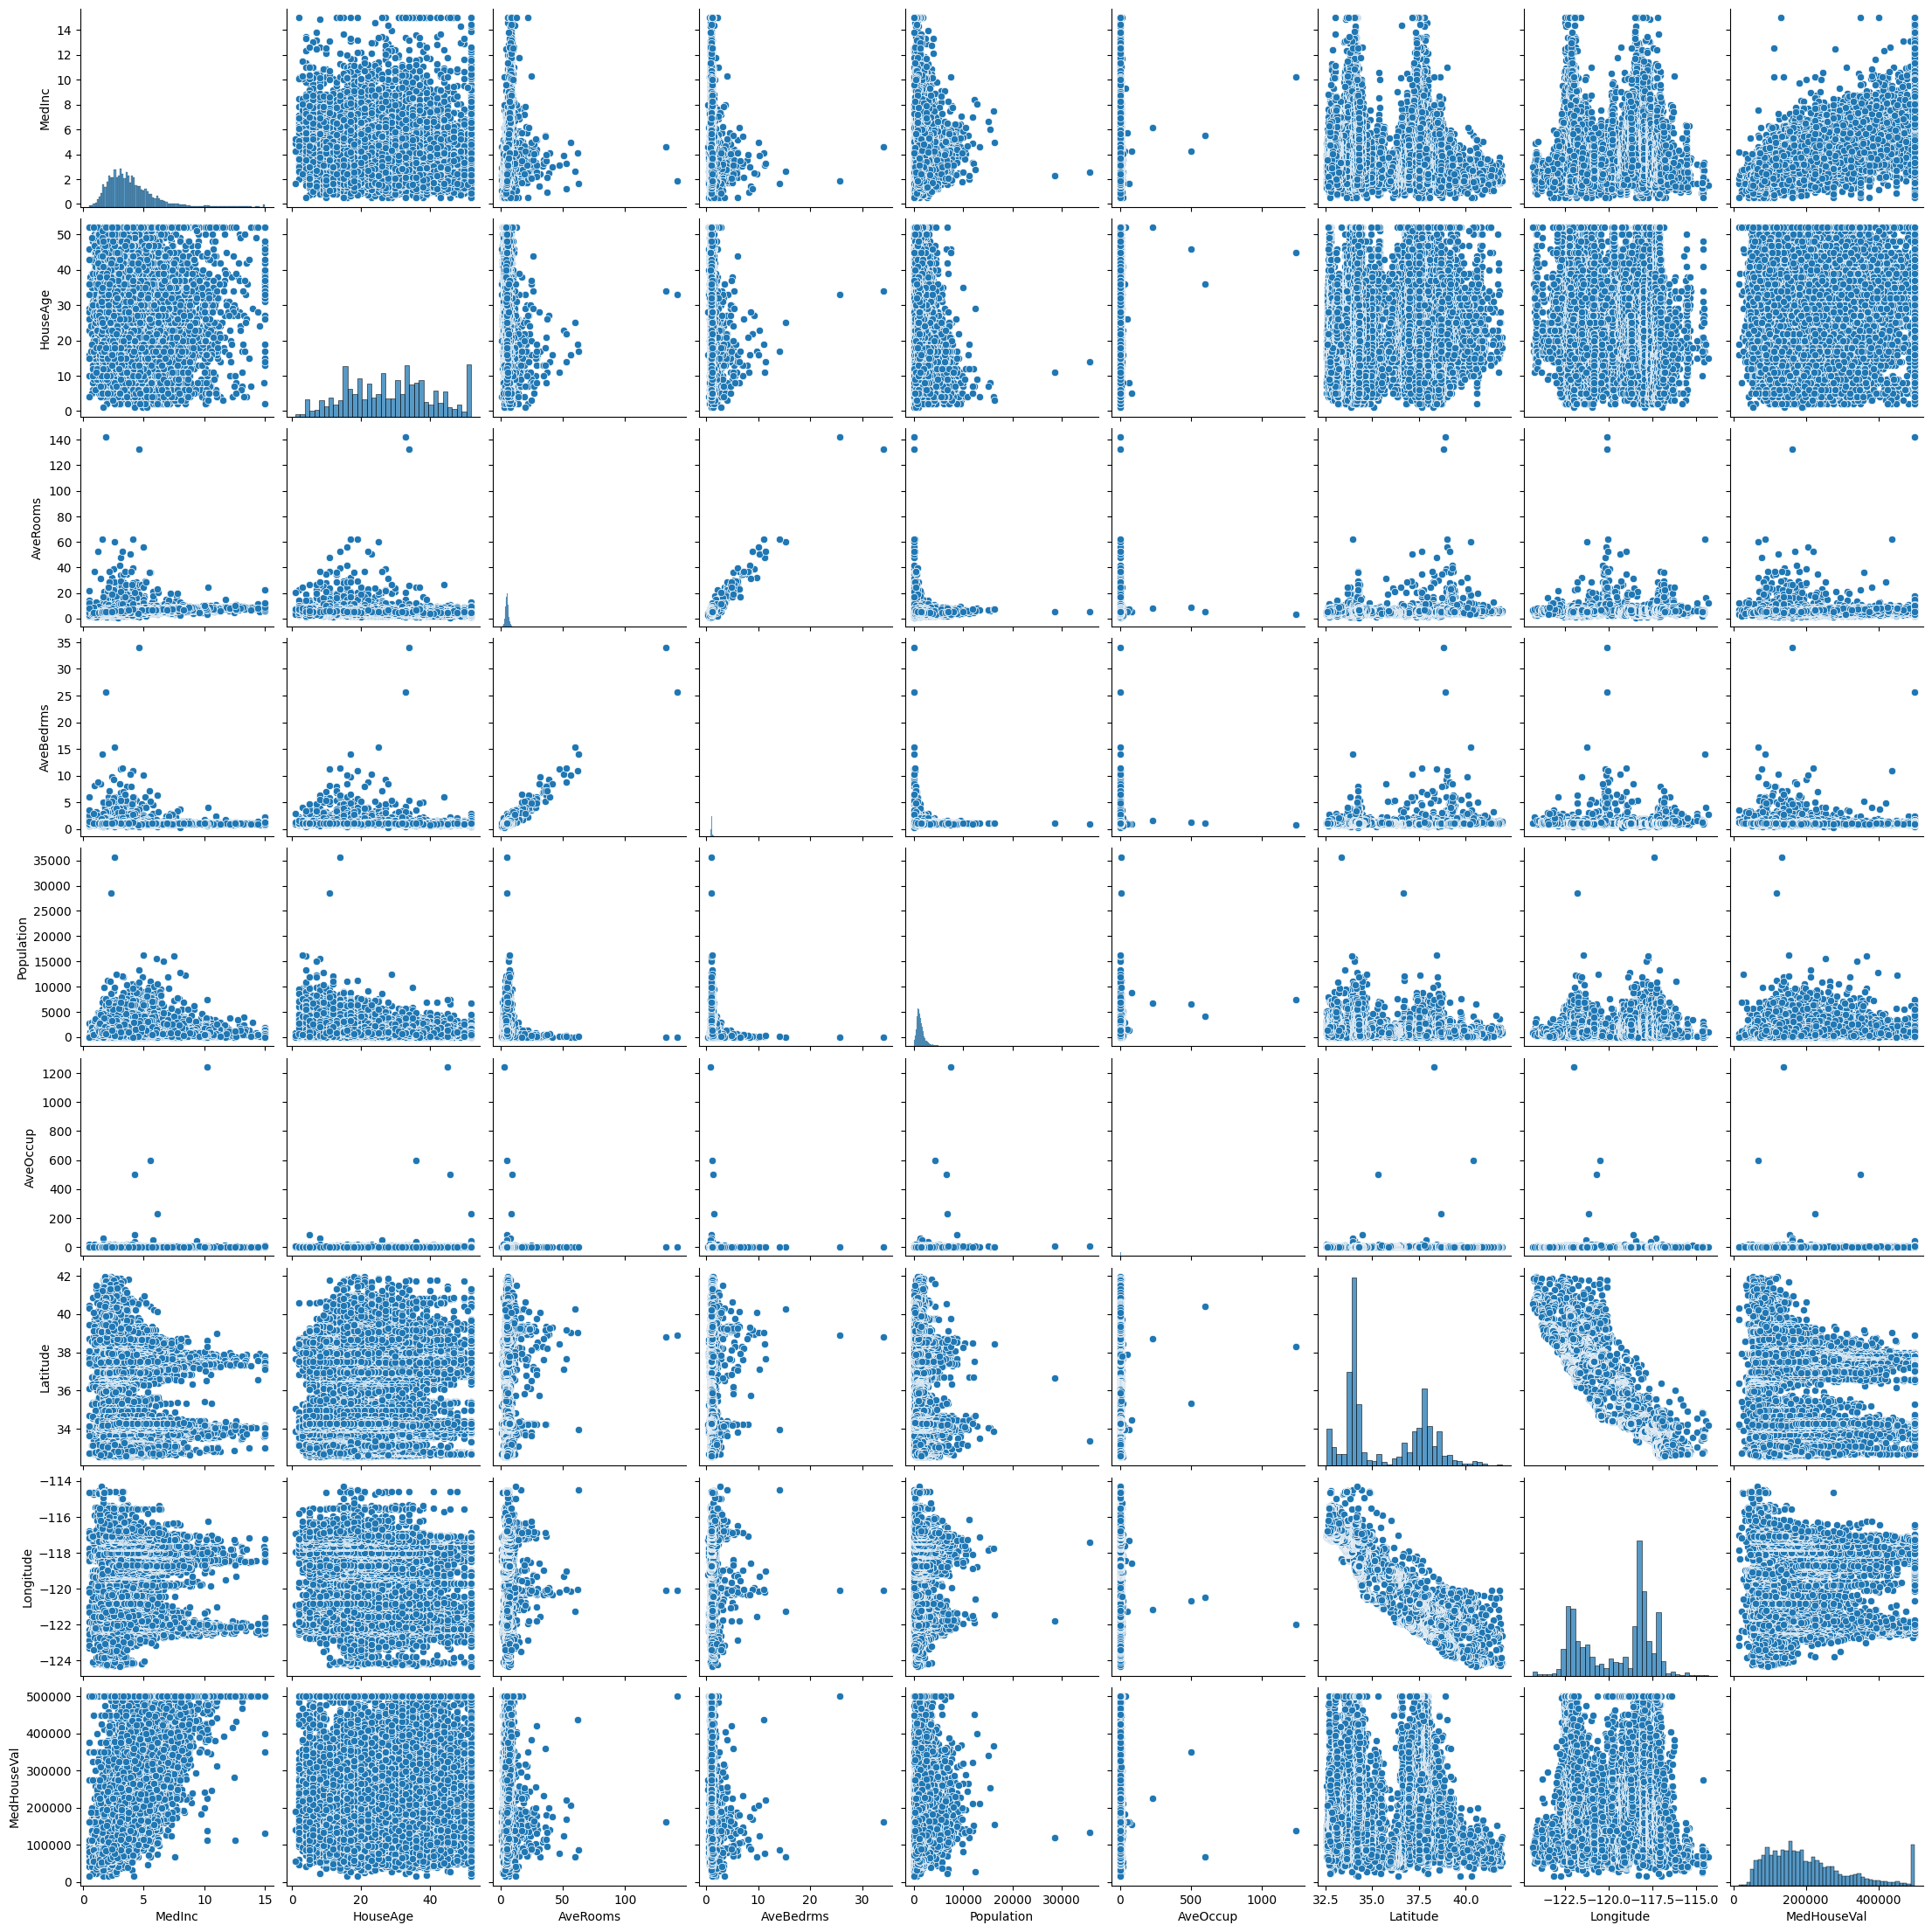

In [94]:
sns.pairplot(df)

In [95]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression().fit(X_train, y_train)
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

acc_train = mean_absolute_error(y_train, y_pred_train)
acc_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(f'r2 score for training is {r2_train:.3f}')
print(f'MAE for training is {acc_train:.3f}')
print(f'MAE for test is {acc_test:.3f}')

r2 score for training is 0.613
MAE for training is 52862.836
MAE for test is 53320.013


In [97]:
# trying with scaling data
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()
scaler.fit(X_train)

# Transform both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression().fit(X_train_scaled, y_train)
y_pred_train = linear_model.predict(X_train_scaled)
y_pred_test = linear_model.predict(X_test_scaled)

acc_train = mean_absolute_error(y_train, y_pred_train)
acc_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(f'r2 score for training is {r2_train:.3f}')
print(f'MAE for training is {acc_train:.3f}')
print(f'MAE for test is {acc_test:.3f}')

r2 score for training is 0.613
MAE for training is 52862.836
MAE for test is 53320.013


In [100]:
# building a dictionary of models to loop over

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Create a dictionary of regression models
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Loop over the models and fit/evaluate each one
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    acc_train = mean_absolute_error(y_train, y_pred_train)
    acc_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred)
    
    # Print the results for each model
    print(f"Model: {model_name}")
    print(f"MAE for training set: {acc_train:.3f}")
    print(f"MAE for test set: {acc_test:.3f}")
    print(f"R2 score for test set: {r2_test:.3f}\n")

Model: RandomForest
MAE for training set: 12222.259
MAE for test set: 32909.912
R2 score for test set: 0.830

Model: GradientBoosting
MAE for training set: 35663.266
MAE for test set: 37165.045
R2 score for test set: 0.830

Model: XGBoost
MAE for training set: 19668.041
MAE for test set: 31051.474
R2 score for test set: 0.830



In [103]:
# XGBoost performed best on the test set
# We'll apply a Grid search CV on it, to fine it furthermore

from sklearn.model_selection import GridSearchCV
xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator and its hyperparameters
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred_train = best_xgb_model.predict(X_train_scaled)
y_pred_test = best_xgb_model.predict(X_test_scaled)

acc_train = mean_absolute_error(y_train, y_pred_train)
acc_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Best hyperparameters: {best_params}')
print(f"MAE for training set: {acc_train:.3f}")
print(f'MAE for test set: {acc_test:.3f}')
print(f'R2 score for test set: {r2_test:.3f}')

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
MAE for training set: 19038.241
MAE for test set: 30255.003
R2 score for test set: 0.840


In [106]:
X_train_scaled.shape[1]

8

In [111]:
# Trying a DNN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim = X_train_scaled.shape[1], activation = 'relu'))
model.add(Dropout(0.2))  
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1152      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)               

In [112]:
history = model.fit(X_train_scaled, y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 2)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate MAE and R2 score for evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE on test set: {mae:.3f}')
print(f'R2 score on test set: {r2:.3f}')

Epoch 1/100
413/413 - 4s - loss: 20740755456.0000 - mean_absolute_error: 103390.9453 - val_loss: 6588610560.0000 - val_mean_absolute_error: 58495.9648 - 4s/epoch - 9ms/step
Epoch 2/100
413/413 - 1s - loss: 6982704128.0000 - mean_absolute_error: 60424.4883 - val_loss: 5211602432.0000 - val_mean_absolute_error: 50973.6836 - 1s/epoch - 3ms/step
Epoch 3/100
413/413 - 1s - loss: 6048546304.0000 - mean_absolute_error: 55914.2109 - val_loss: 4797897728.0000 - val_mean_absolute_error: 48433.5859 - 1s/epoch - 3ms/step
Epoch 4/100
413/413 - 1s - loss: 5754748416.0000 - mean_absolute_error: 54503.6055 - val_loss: 4617565696.0000 - val_mean_absolute_error: 48025.3438 - 1s/epoch - 3ms/step
Epoch 5/100
413/413 - 1s - loss: 5759657984.0000 - mean_absolute_error: 54310.7500 - val_loss: 4569798144.0000 - val_mean_absolute_error: 48513.2227 - 1s/epoch - 3ms/step
Epoch 6/100
413/413 - 2s - loss: 5479674368.0000 - mean_absolute_error: 52812.9688 - val_loss: 4544372736.0000 - val_mean_absolute_error: 46660

Epoch 49/100
413/413 - 2s - loss: 4935613952.0000 - mean_absolute_error: 50025.1992 - val_loss: 4028515584.0000 - val_mean_absolute_error: 43379.4492 - 2s/epoch - 4ms/step
Epoch 50/100
413/413 - 2s - loss: 4923895296.0000 - mean_absolute_error: 49858.8086 - val_loss: 3980084736.0000 - val_mean_absolute_error: 43423.3516 - 2s/epoch - 4ms/step
Epoch 51/100
413/413 - 2s - loss: 4844946944.0000 - mean_absolute_error: 49449.7070 - val_loss: 3876341248.0000 - val_mean_absolute_error: 43118.9336 - 2s/epoch - 4ms/step
Epoch 52/100
413/413 - 2s - loss: 4947978240.0000 - mean_absolute_error: 49952.7578 - val_loss: 3929566720.0000 - val_mean_absolute_error: 43031.6250 - 2s/epoch - 4ms/step
Epoch 53/100
413/413 - 1s - loss: 4805484032.0000 - mean_absolute_error: 49253.3594 - val_loss: 3863755008.0000 - val_mean_absolute_error: 43898.1094 - 1s/epoch - 4ms/step
Epoch 54/100
413/413 - 1s - loss: 4879630848.0000 - mean_absolute_error: 49531.3359 - val_loss: 3945288960.0000 - val_mean_absolute_error: 4

Epoch 97/100
413/413 - 1s - loss: 4815802880.0000 - mean_absolute_error: 49254.9023 - val_loss: 3881180416.0000 - val_mean_absolute_error: 42859.7852 - 1s/epoch - 3ms/step
Epoch 98/100
413/413 - 2s - loss: 4764059136.0000 - mean_absolute_error: 49199.7773 - val_loss: 3911809024.0000 - val_mean_absolute_error: 42662.0938 - 2s/epoch - 4ms/step
Epoch 99/100
413/413 - 1s - loss: 4867019776.0000 - mean_absolute_error: 49419.4531 - val_loss: 3814718208.0000 - val_mean_absolute_error: 42917.5547 - 1s/epoch - 3ms/step
Epoch 100/100
413/413 - 1s - loss: 4810319360.0000 - mean_absolute_error: 49059.2578 - val_loss: 3929694720.0000 - val_mean_absolute_error: 43279.0391 - 1s/epoch - 3ms/step
129/129 [==============================] - 0s 2ms/step
MAE on test set: 41908.347
R2 score on test set: 0.719


In [122]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


<Figure size 500x500 with 0 Axes>

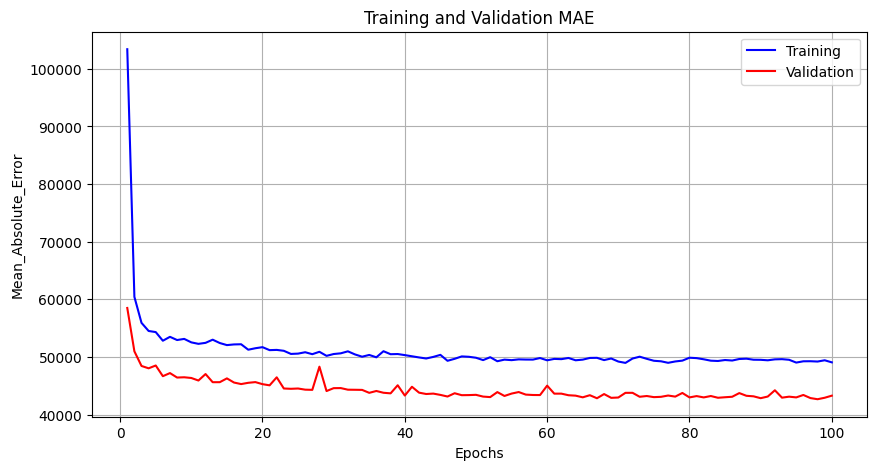

In [134]:
# Plotting a graph
plt.figure(figsize = (5,5))
train_accuracy = history.history['mean_absolute_error']
val_accuracy = history.history['val_mean_absolute_error']
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training')
plt.plot(epochs, val_accuracy, 'r', label='Validation')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean_Absolute_Error')
plt.legend()
plt.grid(True);

In [115]:
import os
import joblib

file_path = 'regression_model.joblib'

joblib.dump(best_xgb_model, file_path)

abs_file_path = os.path.abspath(file_path)
print(f"Model saved at: {abs_file_path}")

Model saved at: /Users/basharkhaddage/Desktop/TutorT/ML Models/regression_model.joblib
